In [4]:
# Importation des bibliothèques principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importation des fonctions de manipulation des données
from sklearn.datasets import load_diabetes, load_iris
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures, Binarizer, KBinsDiscretizer
from sklearn.pipeline import make_pipeline, make_union
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer

# Importation des métriques
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error, median_absolute_error

## Création de pipelines complexes
1) Diviser en deux listes les données catégorielles et les onnées numériques
2) Créationn de pipelines (transformation afin d'avoir des données de meilleure qualité) que chacune de ces listes doivent subir
3) Ensuite utiliser make_column_transform afin d'effectuer les pipelines sur les bonnes données
4) Application d'un model sur ces nouvelles données(après preprocessing) avec model = make_pipeline(preprocessor, model)

In [13]:
titanic  = sns.load_dataset("titanic")
display(titanic.head())
X = titanic.drop("survived", axis=1)
y = titanic["survived"]



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Séparation des données catégories et numériques en 2 listes 
from unicodedata import numeric


numerical_features = ["pclass", "age", "fare"]
#Ou avec make_column_selector
numerical_features = make_column_selector(dtype_include=np.number)
categorical_features = ["sex", "deck", "alone"]
#Ou avec make_column_selector
categorical_features = make_column_selector(dtype_exclude=np.number)
#Création des pipelines
#make_pipeline(enlève valeur manquante, normalisation)
numerical_pipeline = make_pipeline(SimpleImputer(), StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder())

In [ ]:

#transformer = make_column_transformer((StandardScaler(), ["age", "fare"]))

#effectuer les pipelines sur les bonnes données
#transformer = make_column_transformer((pipeline, numerical_features), (pipeline, categorical_features))
preprocessor = make_column_transformer((numerical_pipeline, numerical_features), (categorical_pipeline, categorical_features))


# Création et entraînement d'un pipeline complet : prétraitement des données puis classification avec SGDClassifier
model = make_pipeline(preprocessor, SGDClassifier())
model.fit(X, y)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['pclass', 'age', 'fare']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['sex', 'deck', 'alone'])])),
                ('sgdclassifier', SGDClassifier())])

### Feature Union

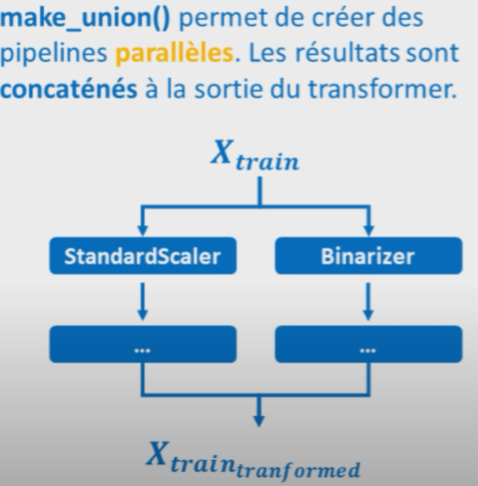

In [ ]:
titanic  = sns.load_dataset("titanic")
titanic = titanic.dropna(subset=["age", "fare"])  # Suppression des lignes avec des valeurs manquantes
display(titanic.head())
X = titanic.drop("survived", axis=1)
y = titanic["survived"]

numerical_features = X[["age", "fare"]]


# On crée un pipeline qui applique deux transformations différentes sur les mêmes données numériques :
# - StandardScaler() : pour centrer et réduire les valeurs (moyenne=0, écart-type=1)
# - Binarizer() : pour transformer les valeurs en 0 ou 1 selon un seuil (par défaut 0)
# make_union permet d'appliquer ces deux transformations en parallèle et de concaténer les résultats
pipeline = make_union(StandardScaler(), Binarizer())
pipeline.fit_transform(numerical_features).shape

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


(714, 4)